In [1]:
import numpy as np
from numpy.linalg import inv
import math
import itertools
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1-A

In [3]:
# kernel matrix
def kernel(X_1, X_2, b):
    k = np.linalg.norm(X_1[None,:,:]-X_2[:,None,:],axis=2)
    return np.exp(-1/b * (k**2))


# Gaussian process
def G_process(X_train, y_train, X_test, b, sigma):
    K_n = kernel(X_train, X_train, b)
    
    I = np.identity(X_train.shape[0])
    c = np.linalg.inv((sigma) * I + K_n)
    
    K_k = kernel(X_test, X_train, b).T
    w = np.dot(K_k, c)
    predict = np.dot(w, y_train)
    
    return predict

## 1-B

In [5]:
rmse = RMSE(y_predict, y_test, c)
rmse_table = pd.DataFrame(
    {'parameters': c, 'rmse_value': rmse})
rmse_table

,parameters,rmse_value
0,"(5, 0.1)",1.966276
1,"(5, 0.2)",1.933135
2,"(5, 0.3)",1.923420
3,"(5, 0.4)",1.922198
4,"(5, 0.5)",1.924769
5,"(5, 0.6)",1.929213
6,"(5, 0.7)",1.934634
7,"(5, 0.8)",1.940583
8,"(5, 0.9)",1.946820
9,"(5, 1)",1.953213


## 1-C

In [6]:
rmse_table.ix[rmse_table['rmse_value'].idxmin()]

parameters    (11, 0.1)
rmse_value      1.89051
Name: 30, dtype: object

The best solution is for b= 11 and sigma = 0.1 with rmse value of 1.89051.

This approach comapring to homework 1 gives lower rmse, therefore we got a more accurate result using Gaussian Process. We can also have confidence intervals for predictions if we calculate covaraince.

However, Gaussian Procecss is computationally more expensive comparing to ridge and polynomial regression specially with large data. therefore there is an issue of scaling.

## 1-D

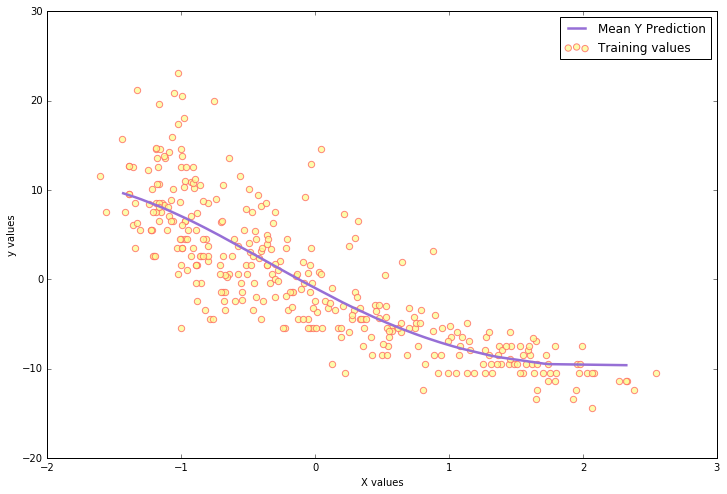

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train_car_weight, y_train, alpha='0.8', facecolors='#fdfd96', edgecolors='#ff6961', s=40)
plt.plot(df_4['x'], df_4['y'], '#966fd6', linewidth=2.5)

plt.ylabel('y values')
plt.xlabel('X values')

labels = ['Mean Y Prediction', 'Training values']
plt.legend(labels)

# 2

 ## 2 - A

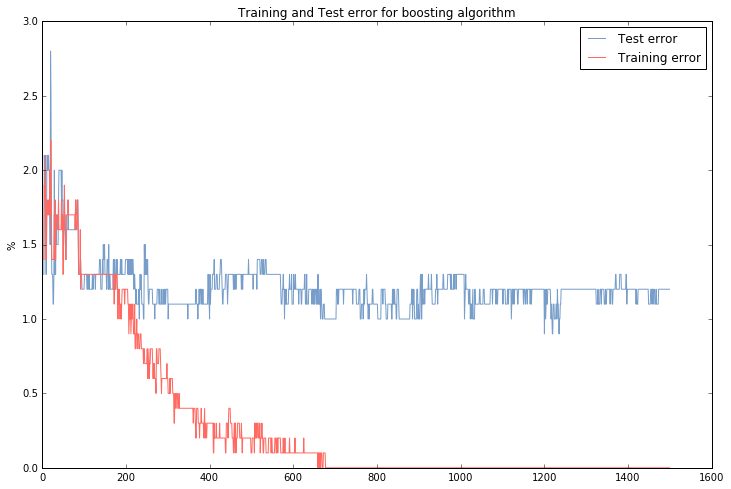

In [12]:
plt.figure(figsize=(12, 8))

plt.plot(test_error, '#779ECB', train_error, '#FF6961')
plt.title('Training and Test error for boosting algorithm')
plt.ylabel('%')
labels = ['Test error', 'Training error']
plt.legend(labels)

## 2-B

(-0.1, 1501)

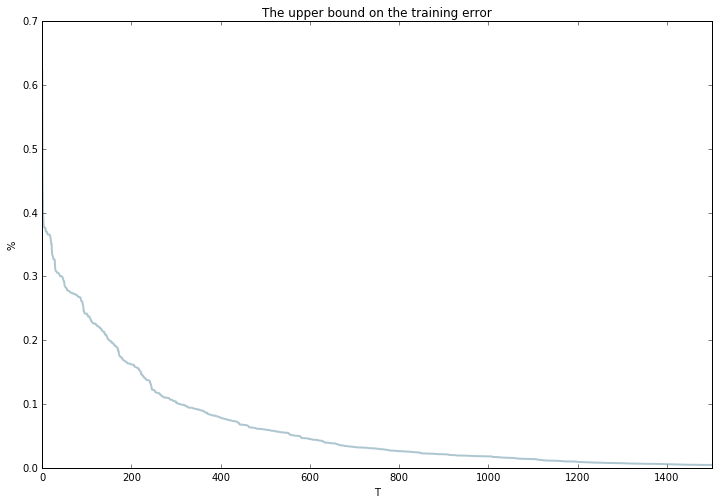

In [13]:
epsilon_array = np.array(epsilon_list)
epsilon = (0.5 - epsilon_array) ** 2

ss = []

for i in range(1, 1501):
    s = np.sum(epsilon[0:i])
    ss.append(s)
ss2 = np.array(ss)
ss2 = np.exp(-2 * ss2)
plt.figure(figsize=(12, 8))

plt.plot(ss2, '#AEC6CF', linewidth=2)
plt.title('The upper bound on the training error')
plt.ylabel('%')
plt.xlabel('T')
plt.xlim(-0.1, 1501)

## 2-C

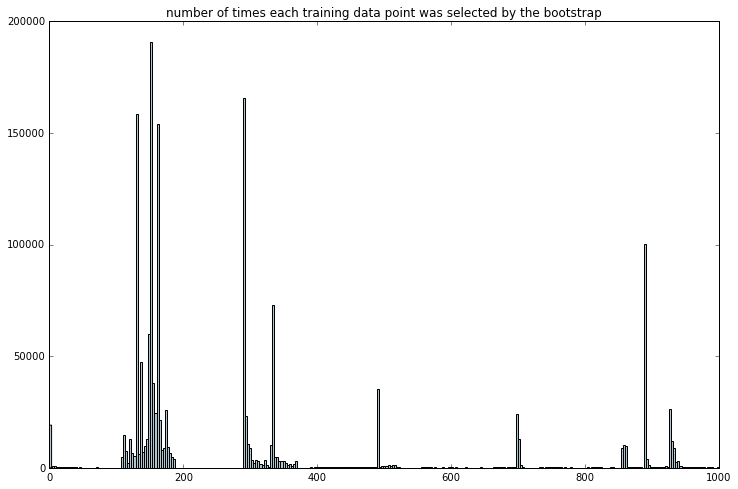

In [14]:
flattened_B = [val for sublist in B_table for val in sublist]

plt.figure(figsize=(12, 8))

plt.hist(flattened_B, bins='auto', color='#AEC6CF')
plt.xlim(-.05, 1000.05)
plt.title('number of times each training data point was selected by the bootstrap')

## 2-D

(0, 0.6)

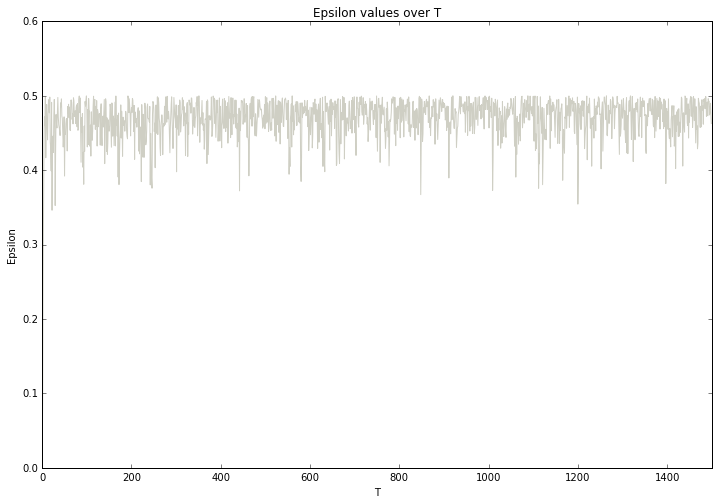

In [15]:
plt.figure(figsize=(12, 8))

plt.plot(epsilon_list, '#CFCFC4')
plt.title('Epsilon values over T')
plt.ylabel('Epsilon')
plt.xlabel('T')
plt.xlim(-0.05, 1500.05)
plt.ylim(0, 0.6)

(0, 0.6)

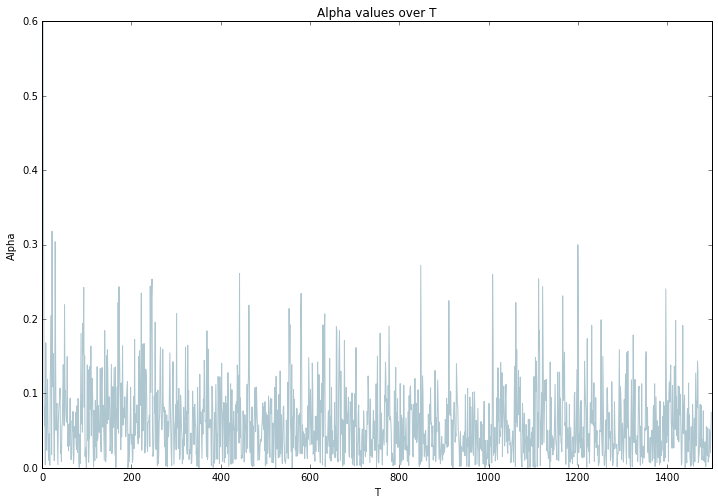

In [16]:
plt.figure(figsize=(12, 8))

plt.plot(alpha_list, '#AEC6CF')
plt.title('Alpha values over T')
plt.ylabel('Alpha')
plt.xlabel('T')
plt.xlim(-0.05, 1500.05)
plt.ylim(0, 0.6)